### 1. 문제정의
- knn(K-Nearst Neighbors) == 유유상종

In [2]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
# sklearn에서 제공해주는 IRIS 데이터 불러오기
from sklearn.datasets import load_iris
# 머신러닝 모델 불러오기 (knn->분류모델)
from sklearn.neighbors import KNeighborsClassifier
# 정확도 측정 도구 불러오기
from sklearn.metrics import accuracy_score

In [3]:
# iris 데이터 확인
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# bunch(다발, 묶음) -> 머신러닝 데이터셋 구조_번치객체 --> 파이썬의 딕셔너리처럼 사용
# data, target ..... 묶음으로 묶어져있다
# DESCR : 데이터에 대한 설명을 볼 수 있다.
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# 특성확인(문제데이터) -> 4개 특성
iris_data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
# 특성의 이름확인
iris_data['feature_names']
# 'sepal length (cm)': 꽃받침의 길이
# 'sepal width (cm)': 꽃받침의 너비
# 'petal length (cm)': 꽃잎의 길이
# 'petal width (cm)': 꽃잎의 너비

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
# 정답데이터(label) 확인하기 -> 'target'
iris_data['target']
# 3가지 꽃의 품종을 의미한다 (0, 1, 2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# 0, 1, 2 꽃(품종)이름 확인
iris_data['target_names']
# 'setosa' == 0, 'versicolor' == 1, 'virginica' == 2

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 데이터 분리
- X_train, Y_train, X_test, Y_test 로 분리
- 데이터를 DataFrame으로 변경해주기
- 문제와 답으로 분리
- 훈련과 테스트 세트로 분리

In [9]:
# 특성데이터 DataFrame으로 변경
iris_df = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
# 문제, 답 분리해서 담아주기 (X, Y)
x = iris_df
y = iris_data['target']
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [11]:
y
# 데이터가 품종 순서대로 배치되어있음을 확인 -> 랜덤으로 섞어서 분리

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
#데이터를 랜덤으로 섞은다음 훈련용과 테스트용으로 나눠주는 도구
from sklearn.model_selection import train_test_split
# train_test_split(문제, 답, test_size = 0.3)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3)

In [13]:
X_train.head()
# 출력해보면 계속해서 랜덤으로 섞어서 나온다
# train_test_split 기능 1. train, test 분리, 2. 랜덤샘플링

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
41,4.5,2.3,1.3,0.3
67,5.8,2.7,4.1,1.0
71,6.1,2.8,4.0,1.3
137,6.4,3.1,5.5,1.8
42,4.4,3.2,1.3,0.2


In [14]:
# 계속해서 인덱스가 변경되는것을 확인
# ㄹ학습데이터가 계속해서 변경되어버리면 하이퍼파라미터를 변경해서 반복하는게 의미가 없음
# 랜덤수를 고정해줄 필요가 있다-> random_state : 수행시마다 동일한 결과를 얻기위해 적용
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=5)
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
126,6.2,2.8,4.8,1.8
61,5.9,3.0,4.2,1.5
124,6.7,3.3,5.7,2.1
117,7.7,3.8,6.7,2.2
20,5.4,3.4,1.7,0.2


In [21]:
# 데이터의 크기 확인
print("훈련용 문제 : ",X_train.shape)
print("훈련용 답 : ", Y_train.shape)
print("테스트용 문제 : ", X_test.shape)
print("테스트용 답 : ", Y_test.shape)

훈련용 문제 :  (105, 4)
훈련용 답 :  (105,)
테스트용 문제 :  (45, 4)
테스트용 답 :  (45,)


In [22]:
#  모델 객체 생성
knn_model = KNeighborsClassifier()
# n_neighbors = 5 --> 하이퍼 파라미터 (사용자매개변수 _ 이웃의 수)
# 디폴트 값은 5, 일반적으로 3~7개 정도를 많이 사용한다.
# 이웃의 수가 작을수록 과대적합, 클수록 과소적합의 위험이 있을 수 있다.

In [25]:
# 모델 학습
# 모델이름.fit(훈련용 문제 , 훈련용 답)
knn_model.fit(X_train,Y_train)
pre = knn_model.predict(X_test)
accuracy_score(Y_test,pre)

0.9555555555555556

In [27]:
# 모델 평가
# 모델 자체에서 제공하는 정확도 확인
# 예측단계를 내부적으로 진행 후에 바로 정확도 확인 --> 결과는 같음

# 모델이름.score(테스트용 문제, 테스트용답)
knn_model.score(X_test,Y_test)

0.9555555555555556

In [29]:
# 하이퍼 파라미터 1로 두고 knn 모델생성
knn = KNeighborsClassifier(n_neighbors=1)
# 학습 바로 평가
knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.9333333333333333

In [32]:
# knn 모델의 하이퍼파라미터를 조절( 1~ 100)
test_list = []
train_list = []

for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    # 학습
    knn.fit(X_train,Y_train)

    #train 데이터에 대한 정확도 -> list 저장
    act_train = knn.score(X_train,Y_train)
    train_list.append(act_train)
    act_test = knn.score(X_test,Y_test)
    test_list.append(act_test)

print(train_list)
print(test_list)

[1.0, 0.9809523809523809, 0.9714285714285714, 0.9714285714285714, 0.9809523809523809, 0.9809523809523809, 0.9809523809523809, 0.9714285714285714, 0.9714285714285714, 0.9809523809523809, 0.9809523809523809, 0.9619047619047619, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9619047619047619, 0.9714285714285714, 0.9619047619047619, 0.9428571428571428, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9238095238095239, 0.9428571428571428, 0.9333333333333333, 0.9333333333333333, 0.9238095238095239, 0.9238095238095239, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143, 0.9238095238095239, 0.9142857142857143, 0.9047619047619048, 0.9142857142857143, 0.9142857142857143, 0.9047619047619048, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143, 0.8857142857142857, 0.8952380952380953, 0.895238095238

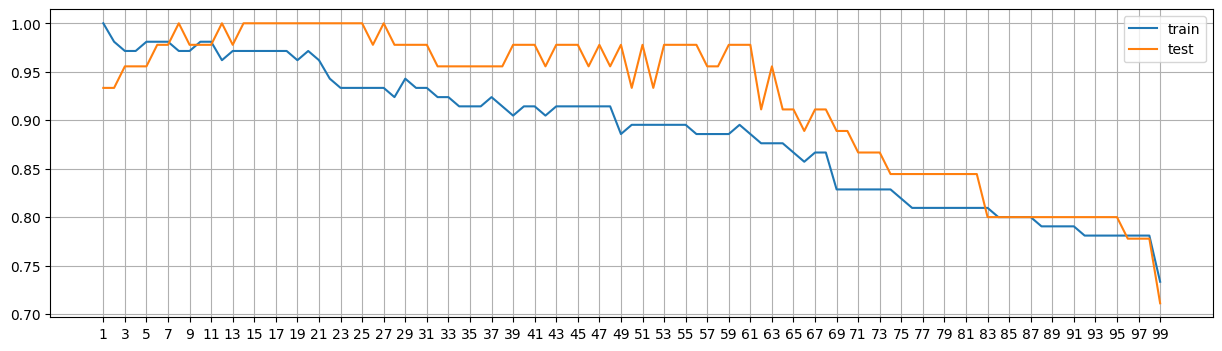

In [47]:
# 시각화 해보기 ( 모델 복잡도 곡선)
plt.figure(figsize=(15,4))
plt.plot(range(1,100), train_list,label = 'train')
plt.plot(range(1,100), test_list ,label='test')
plt.grid()
plt.legend()
plt.xticks(range(1,100,2))

plt.show()